# **First ML Project**

In [1]:
import sklearn
import scipy as scio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Use the following imports in the places you need for this project

1. Load Data
2. Explore Data (Correlations to label, and to each other)
3. Split Data (train_test, train_cv_test)
4. Preprocess Data (normalization, imputation, logarithms (trying to get a gaussian distribution))
5. Create Pipelines (preprocessing all in one)
6. Model Selection
7. Model Tuning

## **Loading the Data**

In [94]:
import csv
data = pd.read_csv('master-6.csv')
data.head()

,Age,Gender,Daily Social Media Usage(hours),Number of Social Media Platforms,Frequency of Posts,Frequency of Checking Notifications,Self Reported Addiction Score,Cyberbullying Experience,Self Esteem Score,Sleep Quality,Anxiety Score,Social Media Fatigue Score,Mental Health Status
0,35,Female,12.0,2,3,2.0,10.0,0,1.0,6.0,7.0,10,0
1,30,Female,12.0,2,2,0.0,10.0,0,1.0,2.0,7.0,9,0
2,16,Female,12.0,2,3,1.0,10.0,0,1.0,5.0,8.0,8,0
3,30,Female,12.0,2,4,1.0,10.0,0,1.0,8.0,8.0,10,0
4,30,Male,12.0,2,2,2.0,10.0,0,1.0,7.0,8.0,10,0


## **Exploring the Data**

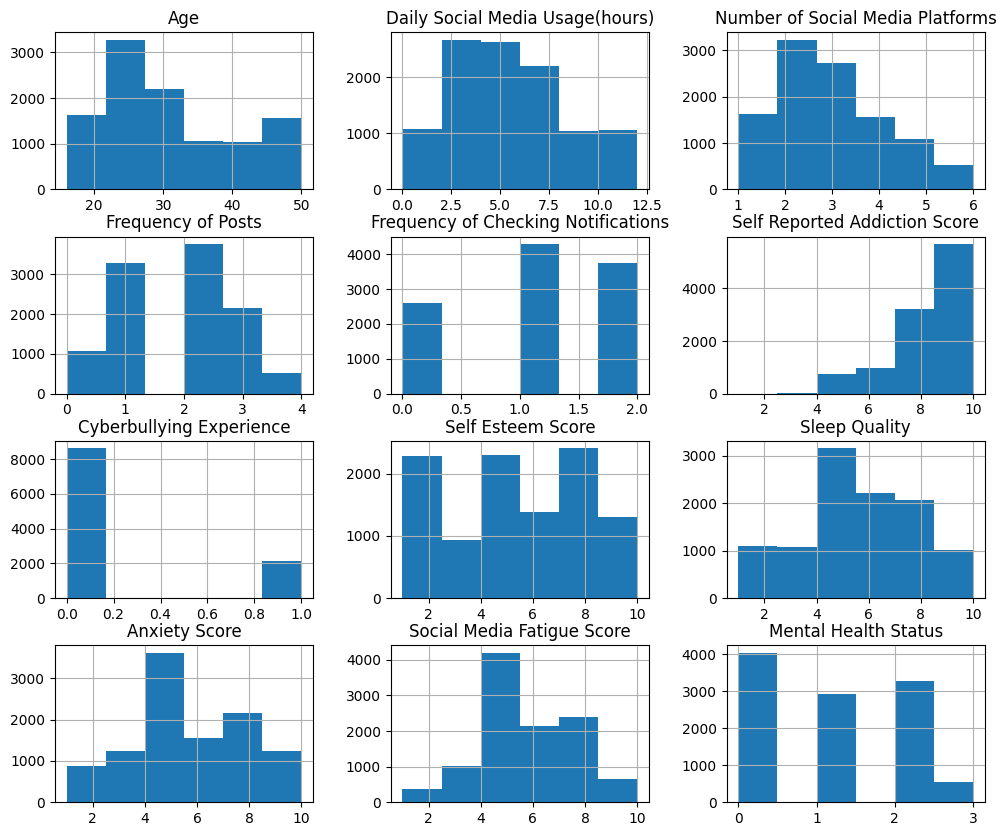

,Age,Daily Social Media Usage(hours),Number of Social Media Platforms,Frequency of Posts,Frequency of Checking Notifications,Self Reported Addiction Score,Cyberbullying Experience,Self Esteem Score,Sleep Quality,Anxiety Score,Social Media Fatigue Score,Mental Health Status
count,10765.000000,10652.000000,10765.000000,10765.000000,10650.000000,10658.000000,10765.000000,10647.000000,10655.000000,10670.000000,10765.000000,10765.000000
mean,29.984765,5.013706,2.891779,1.792290,1.107230,8.351098,0.199443,5.161266,5.463820,5.489410,5.520111,1.031863
std,9.549230,2.947448,1.371896,1.022488,0.765336,1.724754,0.399600,2.727841,2.239252,2.247801,1.801587,0.940543
min,16.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,22.000000,3.000000,2.000000,1.000000,1.000000,7.000000,0.000000,3.000000,4.000000,4.000000,4.000000,0.000000
50%,30.000000,4.000000,3.000000,2.000000,1.000000,9.000000,0.000000,5.000000,5.000000,5.000000,5.000000,1.000000
75%,35.000000,7.000000,4.000000,2.000000,2.000000,10.000000,0.000000,7.000000,7.000000,7.000000,7.000000,2.000000
max,50.000000,12.000000,6.000000,4.000000,2.000000,10.000000,1.000000,10.000000,10.000000,10.000000,10.000000,3.000000


In [95]:
data.hist(bins = 6, figsize =(12, 10) )
plt.show()
data.describe()

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10765 entries, 0 to 10764
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  10765 non-null  int64  
 1   Gender                               10765 non-null  object 
 2   Daily Social Media Usage(hours)      10652 non-null  float64
 3   Number of Social Media Platforms     10765 non-null  int64  
 4   Frequency of Posts                   10765 non-null  int64  
 5   Frequency of Checking Notifications  10650 non-null  float64
 6   Self Reported Addiction Score        10658 non-null  float64
 7   Cyberbullying Experience             10765 non-null  int64  
 8   Self Esteem Score                    10647 non-null  float64
 9   Sleep Quality                        10655 non-null  float64
 10  Anxiety Score                        10670 non-null  float64
 11  Social Media Fatigue Score  

In [97]:
data_num = data.select_dtypes(include = [np.number])
corr_matrix = data_num.corr()
corr_matrix["Anxiety Score"].sort_values(ascending = False)

Anxiety Score                          1.000000
Daily Social Media Usage(hours)        0.891534
Self Reported Addiction Score          0.731156
Social Media Fatigue Score             0.728363
Age                                    0.010749
Sleep Quality                          0.004854
Number of Social Media Platforms       0.001240
Frequency of Posts                    -0.000327
Frequency of Checking Notifications   -0.004205
Cyberbullying Experience              -0.010336
Mental Health Status                  -0.805514
Self Esteem Score                     -0.829373
Name: Anxiety Score, dtype: float64

In [98]:
corr_matrix["Self Esteem Score"].sort_values(ascending = False)

Self Esteem Score                      1.000000
Mental Health Status                   0.842062
Cyberbullying Experience               0.012088
Frequency of Posts                     0.004542
Frequency of Checking Notifications    0.001899
Number of Social Media Platforms      -0.004665
Sleep Quality                         -0.007120
Age                                   -0.009509
Social Media Fatigue Score            -0.763975
Self Reported Addiction Score         -0.789677
Anxiety Score                         -0.829373
Daily Social Media Usage(hours)       -0.925524
Name: Self Esteem Score, dtype: float64

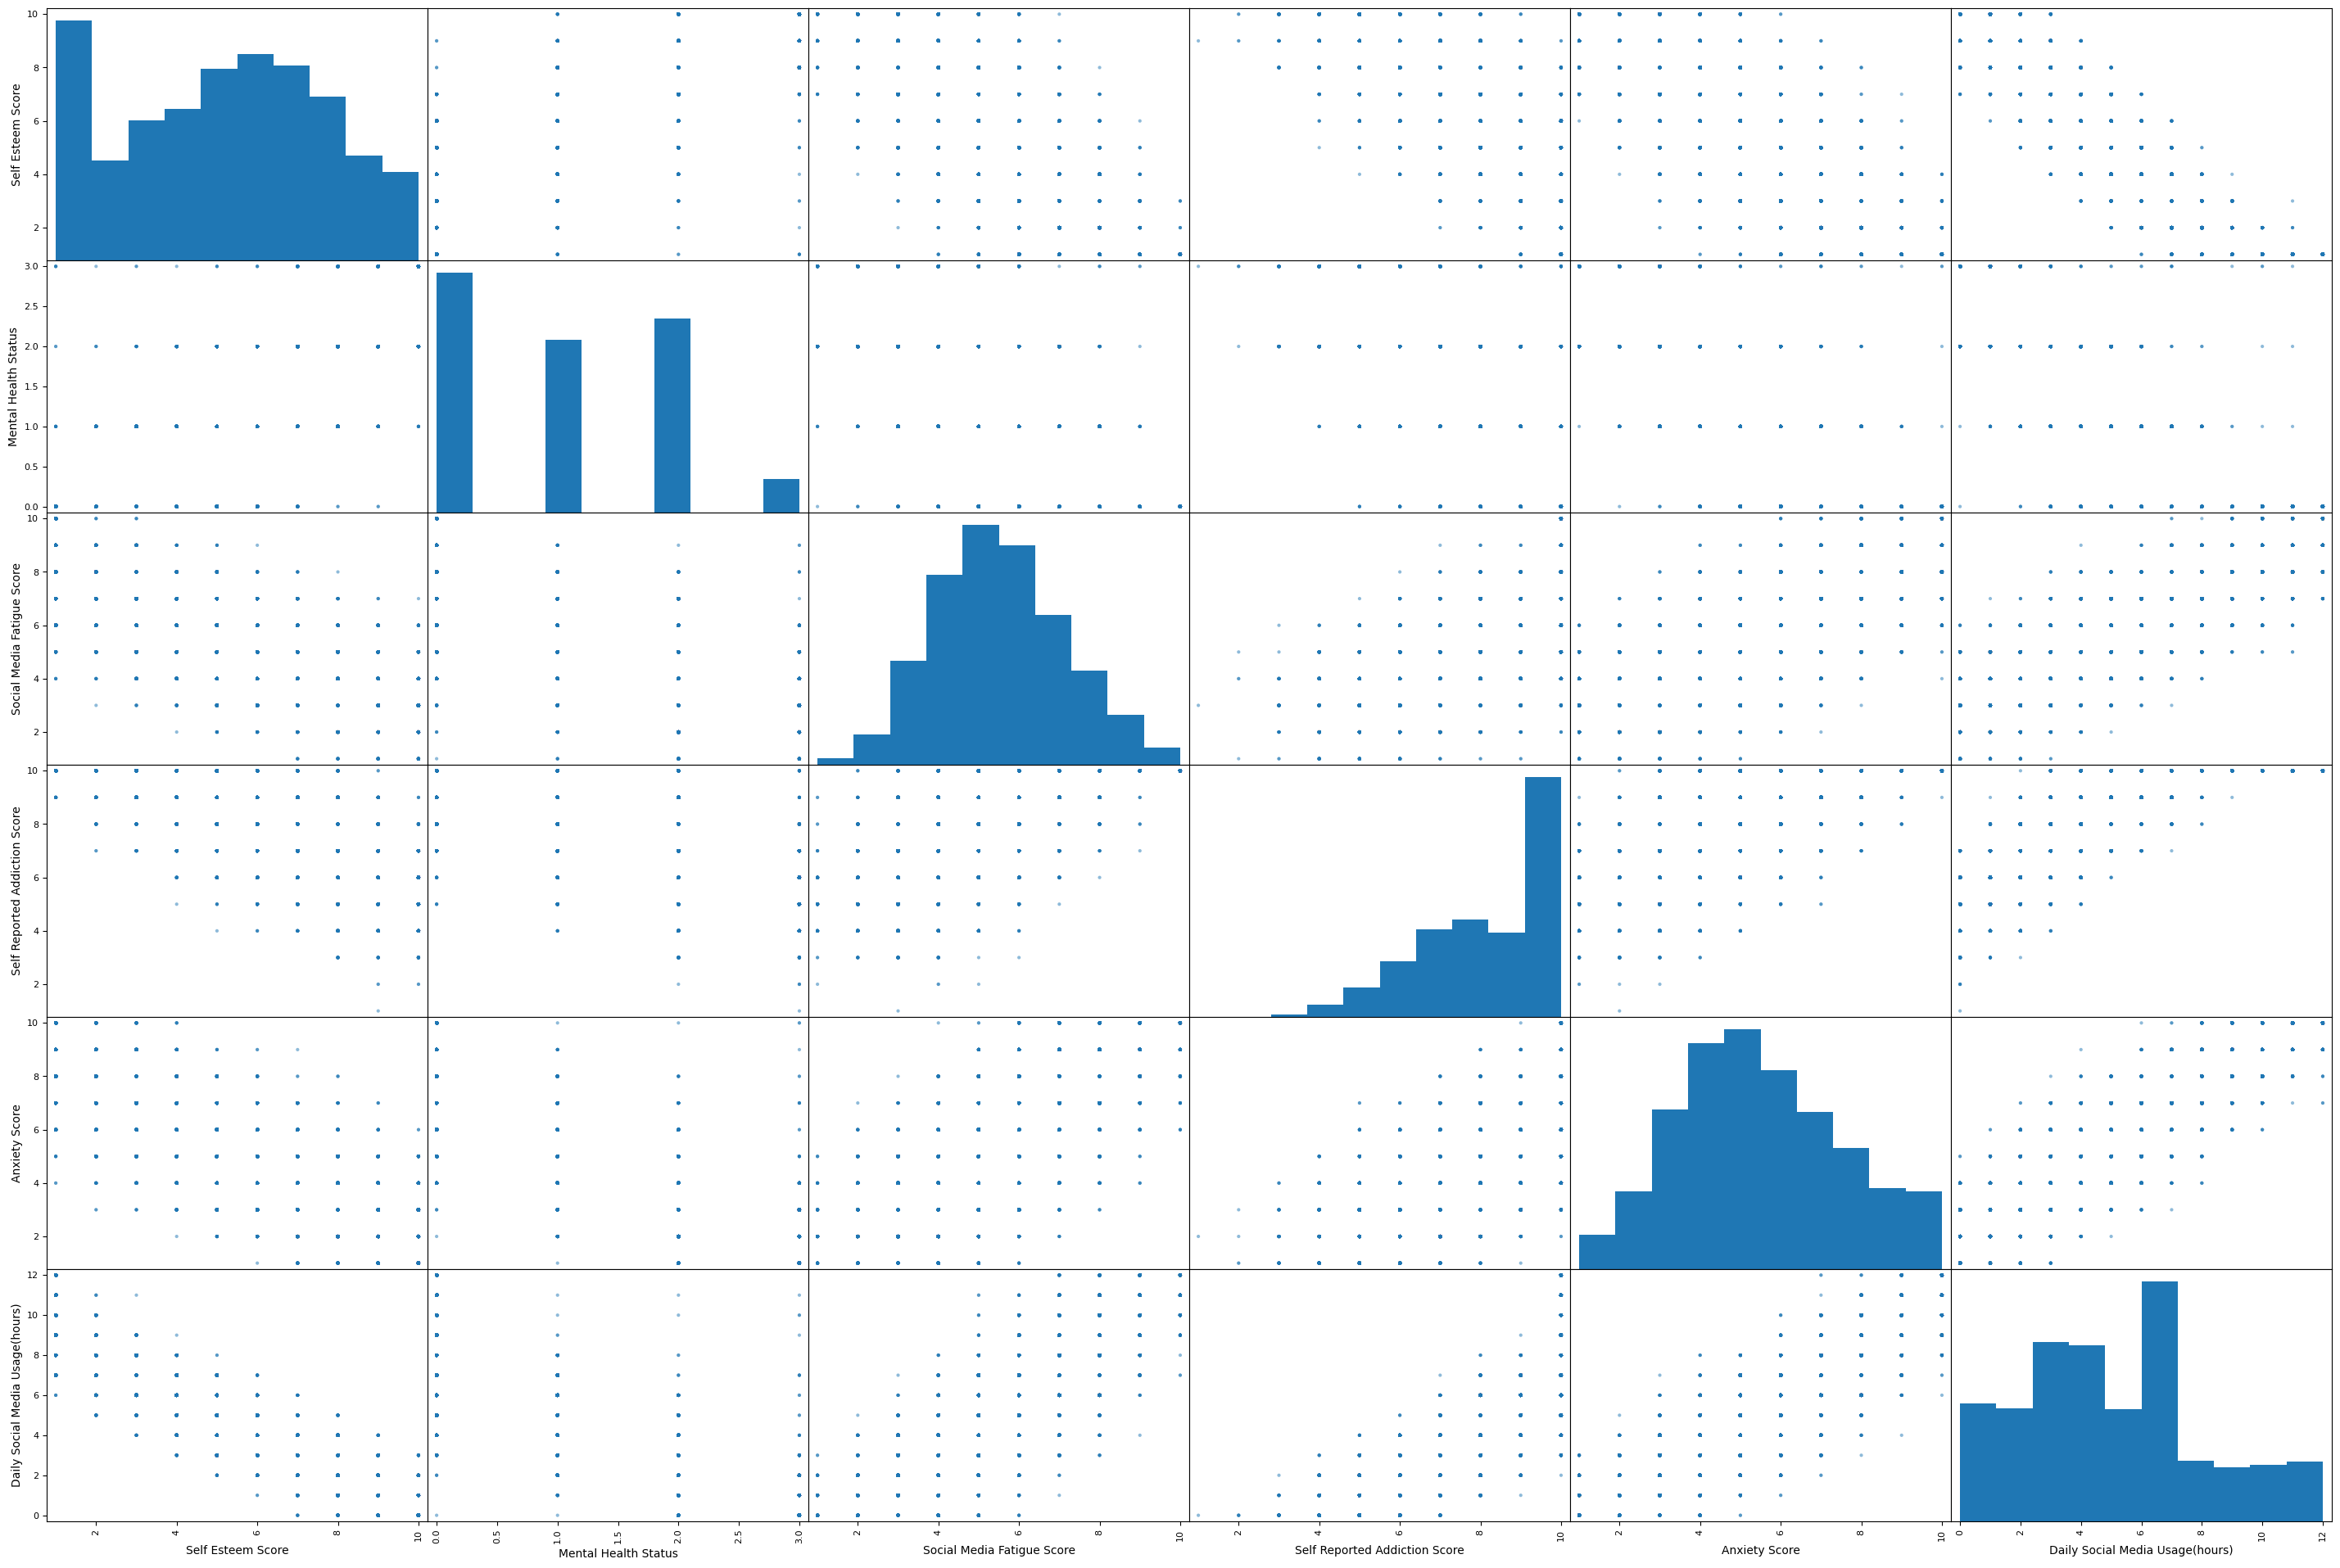

In [99]:
from pandas.plotting import scatter_matrix
attributes = ["Self Esteem Score", "Mental Health Status", "Social Media Fatigue Score", "Self Reported Addiction Score", "Anxiety Score", "Daily Social Media Usage(hours)"]
scatter_matrix(data[attributes], figsize = (36,24))
plt.show()

## **Splitting the Data**

> Never Look at the training set. That leads to Snooping Bias

In [100]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size = 0.2)

In [101]:
data = train_set
data = data.drop("Self Reported Addiction Score", axis = 1)
labels = train_set["Self Reported Addiction Score"]
data.describe()
labels.shape

(8612,)

In [102]:
labels.info()

<class 'pandas.core.series.Series'>
Index: 8612 entries, 10173 to 8416
Series name: Self Reported Addiction Score
Non-Null Count  Dtype  
--------------  -----  
8527 non-null   float64
dtypes: float64(1)
memory usage: 134.6 KB


## **Preprocess Data**

Data is already mostly preprocessed. Just Preform some imputation and Standardization (Not Normalization)
Notice that the transformed data is actually stored in variables other than data (data_num_scaled, data_cat_scaled). This is because we will change the original data in the pipelining portion

In [103]:
#Imputation
from sklearn.impute import SimpleImputer
data_num = data.select_dtypes(include = [np.number])
data_cat = data.select_dtypes(exclude = [np.number])

imputer_num = SimpleImputer(missing_values = np.nan, strategy = 'median')
data_num = imputer_num.fit_transform(data_num)

imputer_cat = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data_cat = imputer_cat.fit_transform(data_cat)

In [104]:
#Standardization of Data.
"""Data and not labels, cuz we don't necessarily want the same transformations done on our data to be done on our labels"""
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
data_num_scaled = std_scaler.fit_transform(data_num)

In [105]:
temp = pd.DataFrame(data_num_scaled, columns = imputer_num.get_feature_names_out())
temp.describe()

,Age,Daily Social Media Usage(hours),Number of Social Media Platforms,Frequency of Posts,Frequency of Checking Notifications,Cyberbullying Experience,Self Esteem Score,Sleep Quality,Anxiety Score,Social Media Fatigue Score,Mental Health Status
count,8.612000e+03,8.612000e+03,8.612000e+03,8.612000e+03,8.612000e+03,8.612000e+03,8.612000e+03,8.612000e+03,8.612000e+03,8.612000e+03,8.612000e+03
mean,-1.526363e-17,-8.663143e-17,-2.145159e-17,-2.454557e-17,1.414980e-16,1.443857e-17,6.971767e-17,1.716127e-16,-4.207812e-17,-2.186412e-16,1.278845e-16
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-1.474004e+00,-1.690906e+00,-1.376243e+00,-1.744160e+00,-1.463004e+00,-5.008345e-01,-1.537565e+00,-2.018801e+00,-1.991803e+00,-2.499254e+00,-1.108161e+00
25%,-8.425709e-01,-6.712715e-01,-6.464722e-01,-7.689794e-01,-1.479648e-01,-5.008345e-01,-8.037400e-01,-6.674941e-01,-6.521116e-01,-8.317508e-01,-1.108161e+00
50%,-6.598815e-04,-3.313932e-01,8.329823e-02,2.062011e-01,-1.479648e-01,-5.008345e-01,-6.991451e-02,2.333771e-01,-2.055479e-01,-2.759164e-01,-4.529402e-02
75%,5.255345e-01,6.882417e-01,8.130687e-01,2.062011e-01,1.167074e+00,-5.008345e-01,6.639109e-01,6.838127e-01,6.875795e-01,8.357524e-01,1.017573e+00
max,2.104118e+00,2.387633e+00,2.272610e+00,2.156562e+00,1.167074e+00,1.996668e+00,1.764649e+00,2.035120e+00,2.027271e+00,2.503256e+00,2.080439e+00


In [106]:
del temp

imputer_num.get_feature_names_out()

array(['Age', 'Daily Social Media Usage(hours)',
       'Number of Social Media Platforms', 'Frequency of Posts',
       'Frequency of Checking Notifications', 'Cyberbullying Experience',
       'Self Esteem Score', 'Sleep Quality', 'Anxiety Score',
       'Social Media Fatigue Score', 'Mental Health Status'], dtype=object)

## **Create Pipelines**

Putting all the preprocessing into a single pipeline (and modifying the actual dataset)

In [107]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder
sklearn.set_config(display = "diagram")

"""Showing off difference between Pipeline and make_pipeline"""
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(missing_values = np.nan, strategy = 'median')),
    ('std_scaler', StandardScaler())
])

cat_pipeline = make_pipeline(SimpleImputer(missing_values = np.nan, strategy = 'most_frequent'),
                             OneHotEncoder(handle_unknown  = 'error'))


num_attributes = make_column_selector(dtype_include=np.number)

cat_attributes = ["Gender"]


preprocessing = ColumnTransformer([
    ("num", num_pipeline, make_column_selector(dtype_include=np.number)),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
], remainder = "passthrough")

labels = pd.DataFrame(labels) # To pass to imputer
labels = imputer_num.fit_transform(labels) #To remove Nan Values

## **Model Selection** (WIP)

> Try out Different Models without tuning hyperparameters too much and see which ones do best

In [108]:
# Linear Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge

linear_model = make_pipeline(preprocessing, LinearRegression())
linear_model.fit(data, labels)
linear_model_predictions = linear_model.predict(data)
print("Predictions 1:\n", linear_model_predictions[:5])


ridge_model = make_pipeline(preprocessing, Ridge())
ridge_model.fit(data, labels)
ridge_model_predictions = ridge_model.predict(data)
print("\nPredictions 2:\n", ridge_model_predictions[:5])

lasso_model = make_pipeline(preprocessing, Lasso())
lasso_model.fit(data, labels)
lasso_model_predictions = lasso_model.predict(data)
print("\nPredictions 3:\n", lasso_model_predictions[:5])

Predictions 1:
 [[ 5.53710818]
 [10.73770974]
 [ 7.46284602]
 [ 6.4768447 ]
 [ 7.11734412]]

Predictions 2:
 [ 5.53708604 10.73731542  7.46331149  6.476471    7.11759797]

Predictions 3:
 [7.69711382 9.12213456 8.08575584 7.9562085  7.9562085 ]


In [109]:
# Decision Tree (Regression)
from sklearn.tree import DecisionTreeRegressor

decisionTree_model = make_pipeline(preprocessing, DecisionTreeRegressor())
decisionTree_model.fit(data, labels)
decisionTree_model_predictions = decisionTree_model.predict(data)
print("Predictions 4:\n", decisionTree_model_predictions[:5])

Predictions 4:
 [ 4. 10.  8.  6.  6.]


In [110]:
# Ensembles (Regression)
from sklearn.ensemble import  AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, StackingRegressor, VotingRegressor

randomForest_model = make_pipeline(preprocessing, RandomForestRegressor())
randomForest_model.fit(data, labels)
randomForest_model_predictions = randomForest_model.predict(data)
print("Predictions 5:\n", randomForest_model_predictions[:5])

adaBoost_model = make_pipeline(preprocessing, AdaBoostRegressor())
adaBoost_model.fit(data, labels)
adaBoost_model_predictions = adaBoost_model.predict(data)
print("\nPredictions 6:\n", adaBoost_model_predictions[:5])

gradientBoost_model = make_pipeline(preprocessing, GradientBoostingRegressor())
gradientBoost_model.fit(data, labels)
gradientBoost_model_predictions = gradientBoost_model.predict(data)
print("\nPredictions 7:\n", gradientBoost_model_predictions[:5])

bagging_model = make_pipeline(preprocessing, BaggingRegressor())
bagging_model.fit(data, labels)
bagging_model_predictions = bagging_model.predict(data)
print("\nPredictions 8:\n", bagging_model_predictions[:5])



C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Predictions 5:
 [ 4.74 10.    7.75  6.34  6.27]


C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Predictions 6:
 [5.71088861 9.7732342  7.44475481 6.50485437 6.50485437]


C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



Predictions 7:
 [4.92058803 9.98961175 7.39179306 6.61456261 6.52606171]


C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\ensemble\_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)



Predictions 10:
 [ 4.5 10.   7.4  6.4  5.9]


In [119]:
# Classification
from sklearn.linear_model import LogisticRegression, RidgeClassifier
logistic_model = make_pipeline(preprocessing, LogisticRegression())
logistic_model.fit(data, labels)
logistic_model_predictions = logistic_model.predict(data)
print("Predictions 1:\n", logistic_model_predictions[:5])

ridge_class_model = make_pipeline(preprocessing, RidgeClassifier())
ridge_class_model.fit(data, labels)
ridge_class_model_predictions = ridge_class_model.predict(data)
print("\nPredictions 2:\n", ridge_class_model_predictions[:5])


C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predictions 1:
 [ 5. 10.  7.  6.  7.]

Predictions 2:
 [ 7. 10.  7.  7.  8.]


C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:1307: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [120]:
# Decision Tree (Classification)
from sklearn.tree import DecisionTreeClassifier

decisionTree_class_model = make_pipeline(preprocessing, DecisionTreeClassifier())
decisionTree_class_model.fit(data, labels)
decisionTree_class_model_predictions = decisionTree_class_model.predict(data)
print("Predictions 3:\n", decisionTree_class_model_predictions[:5])



Predictions 3:
 [ 4. 10.  8.  6.  6.]


In [121]:
# Ensemble(Classification)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,  BaggingClassifier, StackingClassifier, VotingClassifier

randomForest_class_model = make_pipeline(preprocessing, RandomForestClassifier())
randomForest_class_model.fit(data, labels)
randomForest_class_model_predictions = randomForest_class_model.predict(data)
print("Predictions 4:\n", randomForest_class_model_predictions[:5])

adaBoost_class_model = make_pipeline(preprocessing, AdaBoostClassifier())
adaBoost_class_model.fit(data, labels)
adaBoost_class_model_predictions = adaBoost_class_model.predict(data)
print("\nPredictions 5:\n", adaBoost_class_model_predictions[:5])

gradientBoost_class_model = make_pipeline(preprocessing, GradientBoostingClassifier())
gradientBoost_class_model.fit(data, labels)
gradientBoost_class_model_predictions = gradientBoost_class_model.predict(data)
print("\nPredictions 6:\n", gradientBoost_class_model_predictions[:5])

bagging_class_model = make_pipeline(preprocessing, BaggingClassifier())
bagging_class_model.fit(data, labels)
bagging_class_model_predictions = bagging_class_model.predict(data)
print("\nPredictions 7:\n", bagging_class_model_predictions[:5])


C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Predictions 4:
 [ 4. 10.  8.  6.  6.]


C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Predictions 5:
 [ 4. 10.  8.  7.  7.]


C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Predictions 6:
 [ 4. 10.  7.  6.  7.]


C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\ensemble\_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Predictions 7:
 [ 4. 10.  8.  6.  6.]


In [114]:
# Model 7:

In [126]:
#Error Rates (Linear Models):
from sklearn.metrics import r2_score, f1_score, auc,
model1_error = r2_score(labels, linear_model_predictions)
print("Model 1 Train Error:", model1_error)

model2_error = r2_score(labels, ridge_model_predictions)
print("Model 2 Train Error:", model2_error)

model3_error = r2_score(labels, lasso_model_predictions)
print("Model 3 Train Error:", model3_error)

model4_error = r2_score(labels, decisionTree_model_predictions)
print("Model 4 Train Error:", model4_error)

model5_error = r2_score(labels, randomForest_model_predictions)
print("Model 5 Train Error:", model5_error)

model6_error = r2_score(labels, adaBoost_model_predictions)
print("Model 6 Train Error:", model6_error)

model7_error = r2_score(labels, gradientBoost_model_predictions)
print("Model 7 Train Error:", model7_error)

model8_error = r2_score(labels, bagging_model_predictions)
print("Model 8 Train Error:", model8_error)


Model 1 Error: 0.6762808897731402
Model 2 Error: 0.6762808560021945
Model 3 Error: 0.3052861156050126
Model 4 Error: 0.99988282606975
Model 5 Error: 0.9624669959766252
Model 6 Error: 0.7331752586192539
Model 7 Error: 0.7713091318898442
Model 8 Error: 0.9484855066204884


In [122]:
# Need to add additional evaluation metrics for classification models (Precision/Recall/F1)
model10_error = r2_score(labels, logistic_model_predictions)
print("Model 10 Train Error:", model10_error)

model11_error = r2_score(labels, ridge_class_model_predictions)
print("Model 11 Train Error:", model11_error)

model12_error = r2_score(labels, decisionTree_class_model_predictions)
print("Model 12 Train Error:", model12_error)

model13_error = r2_score(labels, randomForest_class_model_predictions)
print("Model 13 Train Error:", model13_error)

model14_error = r2_score(labels, adaBoost_class_model_predictions)
print("Model 14 Train Error:", model14_error)

model15_error = r2_score(labels, gradientBoost_class_model_predictions)
print("Model 15 Train Error:", model15_error)

model16_error = r2_score(labels, bagging_class_model_predictions)
print("Model 16 Train Error:", model16_error)

Model 9 Error: 0.9624669959766252
Model 10 Error: 0.7164781467717494
Model 11 Error: 0.4073733187722486
Model 12 Error: 0.9997656521395
Model 13 Error: 0.9997656521395
Model 14 Error: 0.636877990155249
Model 15 Error: 0.7309686561459994
Model 16 Error: 0.9852360847885


## **Cross-Validation**

In [138]:
from sklearn.model_selection import cross_val_score

model1_CV = cross_val_score(linear_model, data, labels, cv=5, scoring='r2')
print(f"model 1 CV score:\n" , pd.Series(model1_CV).describe())

model2_CV = cross_val_score(ridge_model, data, labels, cv = 5, scoring = 'r2')
print(f"model 2 CV score:\n" , pd.Series(model2_CV).describe())

model3_CV = cross_val_score(lasso_model, data, labels, cv = 5, scoring = 'r2')
print(f"model 3 CV score:\n" , pd.Series(model3_CV).describe())

model4_CV = cross_val_score(decisionTree_model, data, labels, cv = 5, scoring = 'r2')
print(f"model 4 CV score:\n" , pd.Series(model4_CV).describe())

model5_CV = cross_val_score(randomForest_model, data, labels, cv = 5, scoring = 'r2')
print(f"model 5 CV score:\n" , pd.Series(model5_CV).describe())

model6_CV = cross_val_score(adaBoost_model, data, labels, cv = 5, scoring = 'r2')
print(f"model 6 CV score:\n" , pd.Series(model6_CV).describe())

model7_CV = cross_val_score(gradientBoost_model, data, labels, cv = 5, scoring = 'r2')
print(f"model 7 CV score:\n" , pd.Series(model7_CV).describe())

model8_CV = cross_val_score(bagging_model, data, labels, cv = 5, scoring = 'r2')
print(f"model 8 CV score:\n" , pd.Series(model8_CV).describe())

model10_CV = cross_val_score(logistic_model, data, labels, cv = 5, scoring = 'r2')
print(f"model 10 CV score:\n" , pd.Series(model10_CV).describe())

model11_CV = cross_val_score(ridge_class_model, data, labels, cv = 5, scoring = 'r2')
print(f"model 11 CV score:\n" , pd.Series(model11_CV).describe())

model12_CV = cross_val_score(decisionTree_class_model, data, labels, cv = 5, scoring = 'r2')
print(f"model 12 CV score:\n" , pd.Series(model12_CV).describe())

model13_CV = cross_val_score(randomForest_class_model, data, labels, cv = 5, scoring = 'r2')
print(f"model 13 CV score:\n", pd.Series(model13_CV).describe())

model14_CV = cross_val_score(adaBoost_class_model, data, labels, cv = 5, scoring = 'r2')
print(f"model 14 CV score:\n", pd.Series(model14_CV).describe())

model15_CV = cross_val_score(gradientBoost_class_model, data, labels, cv = 5, scoring = 'r2')
print(f"model 15 CV score:\n", pd.Series(model15_CV).describe())

model16_CV = cross_val_score(bagging_class_model, data, labels, cv = 5, scoring = 'r2')
print(f"model 16 CV score:\n", pd.Series(model16_CV.describe()))

model 1 CV score:
 count    5.000000
mean     0.674917
std      0.008040
min      0.664033
25%      0.668551
50%      0.680290
75%      0.680530
max      0.681181
dtype: float64
model 2 CV score:
 count    5.000000
mean     0.674918
std      0.008043
min      0.664035
25%      0.668543
50%      0.680301
75%      0.680526
max      0.681182
dtype: float64
model 3 CV score:
 count    5.000000
mean     0.304546
std      0.007710
min      0.294215
25%      0.300227
50%      0.305367
75%      0.308629
max      0.314295
dtype: float64
model 4 CV score:
 count    5.000000
mean     0.468638
std      0.017499
min      0.450990
25%      0.453829
50%      0.465709
75%      0.480876
max      0.491783
dtype: float64


C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *ar

model 5 CV score:
 count    5.000000
mean     0.732134
std      0.003429
min      0.727076
25%      0.731803
50%      0.732426
75%      0.732648
max      0.736715
dtype: float64


C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

model 6 CV score:
 count    5.000000
mean     0.716367
std      0.024128
min      0.680497
25%      0.706002
50%      0.720051
75%      0.734840
max      0.740444
dtype: float64


C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), f

model 7 CV score:
 count    5.000000
mean     0.756171
std      0.006324
min      0.751411
25%      0.751972
50%      0.754959
75%      0.755489
max      0.767022
dtype: float64


C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\ensemble\_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\ensemble\_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\ensemble\_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_

model 8 CV score:
 count    5.000000
mean     0.706256
std      0.005282
min      0.697580
25%      0.705423
50%      0.708200
75%      0.708764
max      0.711313
dtype: float64


C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science

model 10 CV score:
 count    5.000000
mean     0.710454
std      0.003426
min      0.706025
25%      0.707916
50%      0.711836
75%      0.711947
max      0.714548
dtype: float64
model 11 CV score:
 count    5.000000
mean     0.400421
std      0.013980
min      0.379472
25%      0.394338
50%      0.404484
75%      0.408327
max      0.415483
dtype: float64


C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:1307: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:1307: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScien

model 12 CV score:
 count    5.000000
mean     0.507768
std      0.008577
min      0.498781
25%      0.502560
50%      0.503967
75%      0.514527
max      0.519004
dtype: float64


C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScience

model 13 CV score:
 count    5.000000
mean     0.659997
std      0.006587
min      0.651150
25%      0.657634
50%      0.660759
75%      0.661068
max      0.669375
dtype: float64


C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProj

model 14 CV score:
 count    5.000000
mean     0.639768
std      0.039837
min      0.570993
25%      0.647166
50%      0.647301
75%      0.661354
max      0.672026
dtype: float64


C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScien

model 15 CV score:
 count    5.000000
mean     0.692223
std      0.007777
min      0.683657
25%      0.686899
50%      0.692339
75%      0.694353
max      0.703869
dtype: float64


C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\ensemble\_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\ensemble\_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProj

model 16 Train Error:
[0.58530073 0.59143522 0.59607865 0.60677182 0.5925768 ]


## **Model Tuning** (To Do)

In [140]:
from sklearn.model_selection import GridSearchCV


C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\ensemble\_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\ensemble\_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProj

model 16 CV score:
 count    5.000000
mean     0.591107
std      0.013773
min      0.569877
25%      0.585804
50%      0.596609
75%      0.597843
max      0.605402
dtype: float64


C:\Users\Morad Elshorbagy\Desktop\University\Git\DataScienceProject\Data Science Project\.venv\Lib\site-packages\sklearn\ensemble\_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## **Test Set** (To Do)

In [ ]:
# Never use fit or fit_transform on test_set. Only use transform)(